# IBM HR Analytics


The following dataset was created by IBM data scientists and includes 1470 listings. The challenge is to uncover the factors that lead to employee attrition and to create a model that predicts the churn of employees.





Further explanation of different columns:



Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

PerformanceRating
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

# 1. First View on the Data

In [3]:
#Standard Imports

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
%matplotlib inline

# Plotly Imports 
import plotly.offline as py
#py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

#Import Models for Prediction
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report)


from imblearn.over_sampling import SMOTE


import xgboost

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.

/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning:

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re

In [4]:
#Loading the data
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [49]:
#Checking the data
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

           ...           RelationshipSatisfaction StandardHours  \
0          ...                                  1            80   
1          ...                                  4            80   
2          ...                                  2            80   
3          ...                                  3            80   
4          ...                                  4            80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  \
0                 0                  8                      0               1   
1                 1                 10                      3               3   
2                 0                  7                      3               3   
3                 0                  8                      3               3   
4                 1                  6                      3               3   

   YearsAtCompany YearsInCurrentRole  YearsSinceLastPromotion  \
0               6                  4                        0   
1              10                  7                        1   
2               0                  0                        0   
3               8                  7                        3   
4               2                  2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 35 columns]

In [50]:
#Checking if any data is missing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [51]:
df['Attrition'].value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

The dataset includes 140 observations and 35 features. This data consists of two different datatypes: Categorical (mostly ordinal variables) and numerical.
Our target variable is the "Attrition" column. 1237 (84% of cases) employees did not leave the organization while 237 (16% of cases) did leave the organization making our dataset to be considered imbalanced since more people stay in the organization than they actually leave. 

Luckily there is no missing data. So we can dig deeper into the data by EDA



# 2. Exploratory Data Analysis

## 2.1 General View on our Target 

First of all, let's have a look on our imbalanced target variable. 84% of employees did not quit the organization while 16% did leave the organization. Knowing that we are dealing with an imbalanced dataset will help us to determine the best model for our predictions:

Text(0.5,1,'Attrition Rate (Total)')

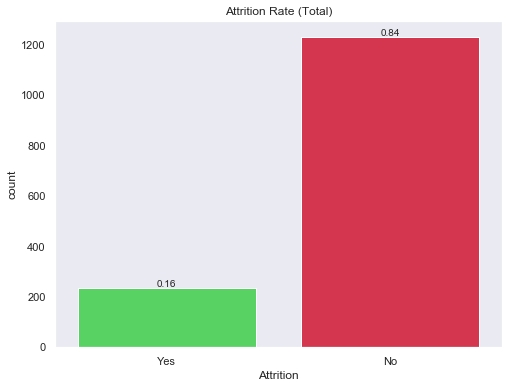

In [52]:
plt.figure(figsize=[8,6])

colors = ['#43e653','#ed1c3c']

g=sns.countplot(df['Attrition'], palette=colors)

total = float(len(df))
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 

g.set_title('Attrition Rate (Total)')


## 2.2 The Impact of Income towards Attrition

I wonder how much importance does each employee give to the income they earn in the organization. Here we will find out if it is true that money is really everything!

## Questions

- What is the average monthly income by department? Are there any significant differences between individuals who quit and didn't quit?
- Are there significant changes in the level of income by Job Satisfaction? Are individuals with a lower satisfaction getting much less income than the ones who are more satisfied?
- Do employees who quit the organization have a much lower income than people who didn't quit the organization?
- Do employees with a higher performance rating earn more than with a lower performance rating? Is the difference significant by Attrition status?

## Summary

- Income by Departments: Wow! We can see huge differences in each department by attrition status.

- Income by Job Satisfaction: Hmm. It seems the lower the job satisfaction the wider the gap by attrition status in the levels of income.

- Attrition sample population: I would say that most of this sample population has had a salary increase of less than 15% and a monthly income of less than 7,000

- Exhaustion at Work: Over 54% of workers who left the organization worked overtime! Will this be a reason why employees are leaving?

- Differences in the DailyRate: HealthCare Representatives , Sales Representatives , and Research Scientists have the biggest daily rates differences in terms of employees who quit or didn't quit the organization. This might indicate that at least for the these roles, the sample population that left the organization was mainly because of income.

## Average Income by Department

Text(0.5,0.98,'Average Income by Department & Attrition')

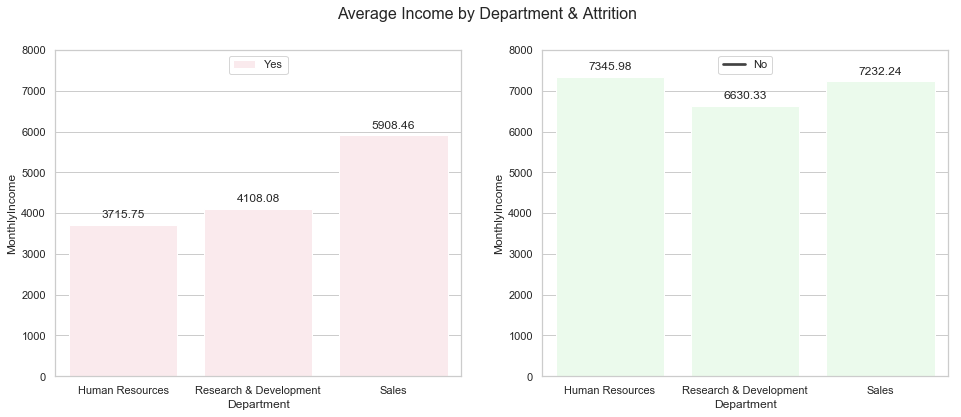

In [53]:
inc_n = df[df['Attrition']=='No']

inc_y = df[df['Attrition']=='Yes']


avg_inc_n = inc_n.groupby(['Department','Attrition'])['MonthlyIncome'].mean().to_frame()
avg_inc_n.reset_index(inplace=True)

avg_inc_y = inc_y.groupby(['Department','Attrition'])['MonthlyIncome'].mean().to_frame()
avg_inc_y.reset_index(inplace=True)


sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(16,6))

g = sns.barplot(x='Department', y='MonthlyIncome', hue='Attrition', data=avg_inc_y, color='#ed1c3c', ax=axes[0])
g.set_ylim(0,8000)
g.legend(loc='upper center')
for p in g.patches:
    g.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2.,p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')




f = sns.barplot(x='Department', y='MonthlyIncome', hue='Attrition', data=avg_inc_n, color='#43e653', ax=axes[1])
f.set_ylim(0,8000)
f.legend(['No'],loc='upper center')
for p in f.patches:
    f.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2.,p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

fig.suptitle('Average Income by Department & Attrition', size=16)



## Satisfaction by Income

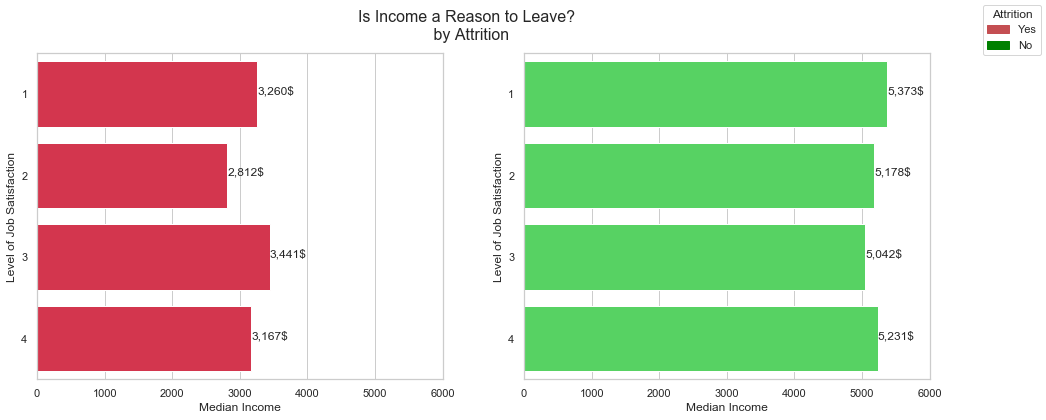

In [54]:
inc_n = df[df['Attrition']=='No']
inc_y = df[df['Attrition']=='Yes']


avg_inc_n = inc_n.groupby(['JobSatisfaction','Attrition'])['MonthlyIncome'].median().to_frame()
avg_inc_n.reset_index(inplace=True)


avg_inc_y = inc_y.groupby(['JobSatisfaction','Attrition'])['MonthlyIncome'].median().to_frame()
avg_inc_y.reset_index(inplace=True)

sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16,6))


g = sns.barplot(x='MonthlyIncome', y='JobSatisfaction',data=avg_inc_y, color='#ed1c3c', orient='h', ax=axes[0])
g.set_xlim(0,6000)
g.set_xlabel('Median Income')
g.set_ylabel('Level of Job Satisfaction')
for p in g.patches:
    val= '{:,.0f}$'.format(p.get_width())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    g.annotate(val,(x,y))



f = sns.barplot(x='MonthlyIncome', y='JobSatisfaction',color='#43e653', orient='h',data=avg_inc_n, ax=axes[1])
f.set_xlim(0,6000)
f.set_xlabel('Median Income')
f.set_ylabel('Level of Job Satisfaction')
for p in f.patches:
    val= '{:,.0f}$'.format(p.get_width())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    f.annotate(val,(x,y))

red_patch = mpatches.Patch(color='r', label='Yes')
green_patch = mpatches.Patch(color='green', label='No')


fig.suptitle('Is Income a Reason to Leave? \n by Attrition', size=16)
fig.legend(handles=[red_patch, green_patch], title='Attrition')

## Income and its Impact on Attrition

Text(0.5,0.98,'Income and its Impact \n on Attrition \n')

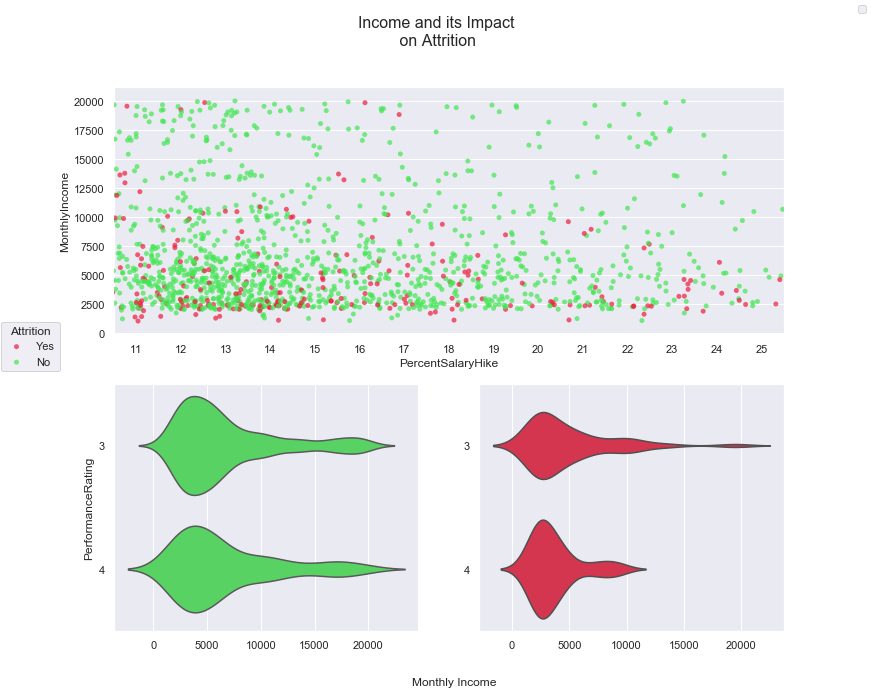

In [55]:
gs = gridspec.GridSpec(2, 4)
gs.update(wspace=0.5)

sns.set(style="darkgrid")
fig=plt.figure(figsize=(12,10))
fig.tight_layout(pad=3.0)

ax1 = plt.subplot(gs[0, :])
ax2 = plt.subplot(gs[1, 0:2])
ax3 = plt.subplot(gs[1, 2:4])

colors = ['#ed1c3c','#43e653']

f=sns.stripplot(x=df['PercentSalaryHike'], y=df['MonthlyIncome'], hue=df['Attrition'], 
              ax=ax1, palette=colors, alpha=0.7, jitter=1.5)
f.legend().set_visible(False)

g=sns.violinplot(x=inc_n['MonthlyIncome'], y=inc_n['PerformanceRating'], orient='h',
                 ax=ax2, color='#43e653', inner=None, alpha=0.5)
g.set_xlabel('')


h=sns.violinplot(x=inc_y['MonthlyIncome'], y=inc_y['PerformanceRating'], orient='h',
                 ax=ax3, inner=None, color='#ed1c3c', sharex=ax2, alpha=0.5)
h.set_ylabel('')
h.set_xlabel('')



fig.legend(df['Attrition'].unique(),    
           labels=df['Attrition'].unique(),   
           loc=6,  
           borderaxespad=0.1,  
           title="Attrition" 
           )

fig.legend([g,f,h], 'Atttio')
fig.text(0.47,0.05,'Monthly Income')
fig.suptitle('Income and its Impact \n on Attrition \n', size=16)

## Level of Attrition by Overtime Status

Text(0.5,0.98,'Level of Attrition by Overtime Status')

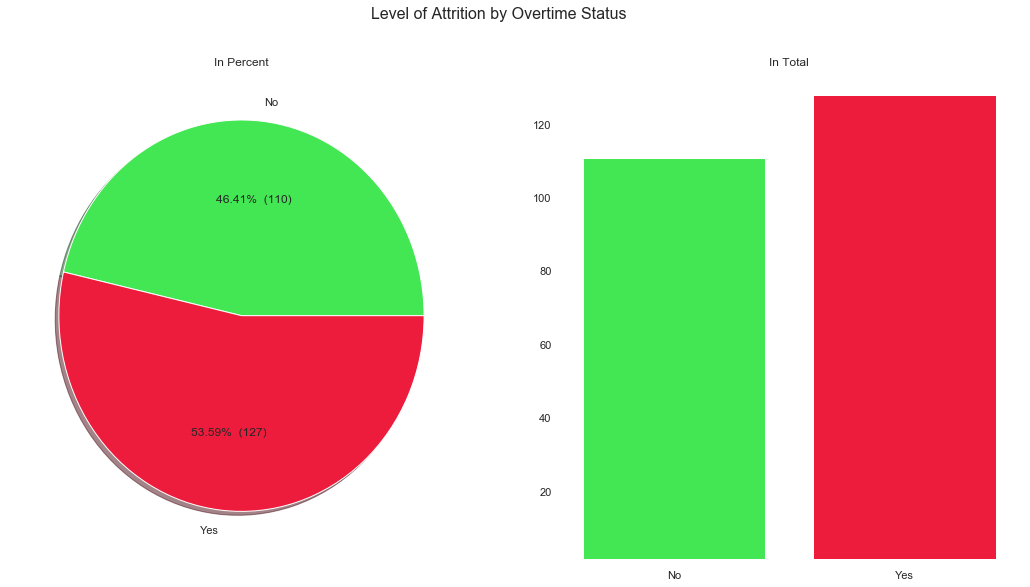

In [56]:
fig, axes = plt.subplots(ncols=2, figsize=(18,9))



def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct


colors = ['#43e653','#ed1c3c']


f=axes[0].pie(inc_y.groupby('OverTime').count()['Age'], labels=['No','Yes'],
              autopct=make_autopct(inc_y.groupby('OverTime').count()['Age']),
              colors=colors, shadow=True)

axes[0].title.set_text('In Percent')



                   
g=axes[1].bar(x=['No','Yes'],height=inc_y.groupby('OverTime').count()['Age'], color=colors,linewidth=3, 
              bottom=1, ecolor='white')
axes[1].set_facecolor('white')
axes[1].title.set_text('In Total')




fig.patch.set_facecolor('white')
fig.suptitle('Level of Attrition by Overtime Status', size=16)

## 2.3 Working Environment

In this section, we will explore everything that is related to the working environment and the structure of the organization.

## Questions

- Job Roles: How many employees in each Job Role?
- Salary by Job Role: What's the average salary by job role?
- Attrition by Job Role: What's the attrition percentage by job role? Which job role has the highest attrition rate? Which has the lowest?
- Years with Current Manager What's the average satisfaction rate by the status of the manager? Are recently hired managers providinga higher job satisfaction to employees?


## Summary

- Number of Employees by Job Role: Sales and Research Scientist are the job positions with the highest number of employees.
- Salary by Job Role: Managers and Research Directors have the highest salary on average.
- Attrition by Job Role: Sales Representatives, HR and Laboratory Technician have the highest attrition rates. This could give us a hint that in these departments we are experiencing certain issues with employees.
- Managers: Employees that are dealing with recently hired managers have a lower satisfaction score than managers that have been there for a longer time.


## Major Job Roles Part I

<Figure size 720x432 with 0 Axes>

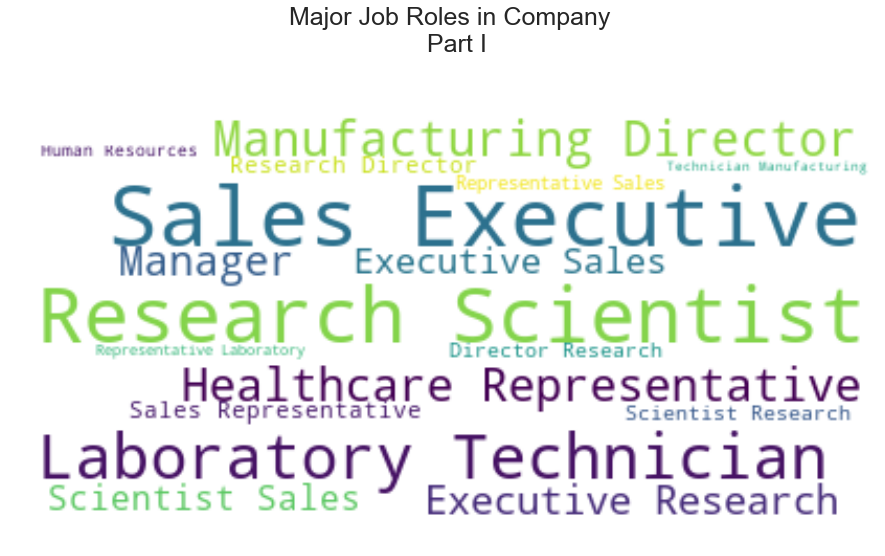

In [57]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in df.JobRole)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200, background_color="white").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Major Job Roles in Company \n Part I\n \n', size=25)
plt.show()

## Major Job Roles Part II 

Text(0.5,1,'Major Job Roles in Company \n Part II')

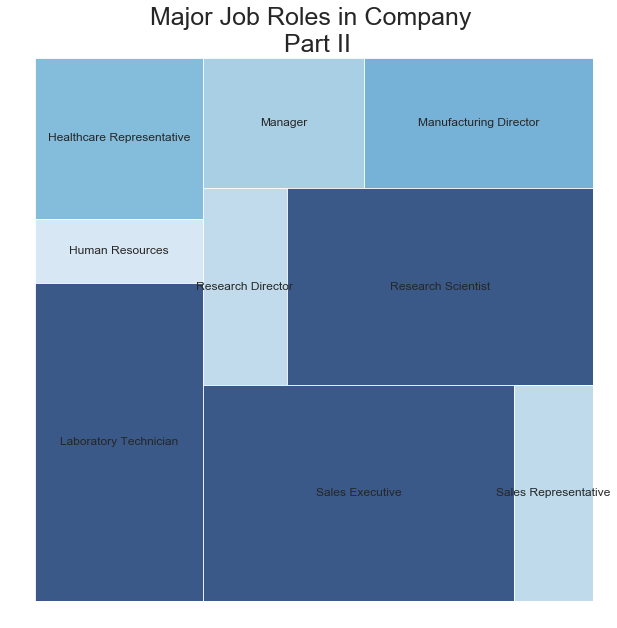

In [58]:
import squarify
fig=plt.figure(figsize=[10,10])

my_values = df.groupby('JobRole').count()['Age']

cmap = plt.cm.Blues
mini=min(my_values)
maxi=max(my_values)
colors = [cmap(value) for value in my_values]



squarify.plot(sizes=df.groupby('JobRole').count()['Age'], label=df.groupby('JobRole').count().index,alpha=0.8, color=colors)
plt.axis('off')
plt.gca().invert_yaxis()

plt.title("Major Job Roles in Company \n Part II", fontsize=25)




## Median Vs. Mean Income by Job Role

Text(0.5,0.98,'Median vs. Mean Income by different Job Roles')

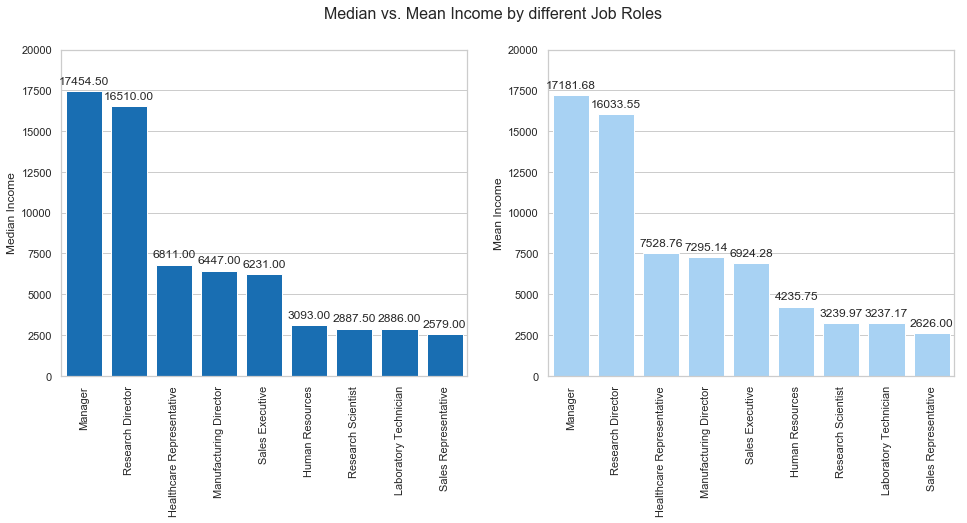

In [59]:
inc_med = df.groupby('JobRole')['MonthlyIncome'].median().sort_values(ascending=False)
inc_mea = df.groupby('JobRole')['MonthlyIncome'].mean().sort_values(ascending=False)



sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(16,6))

g = sns.barplot(x=inc_med.index, y=inc_med, data=df, color='#0071CB', ax=axes[0])
g.set_ylim(0,20000)
g.set_ylabel('Median Income')
g.set_xlabel('')
g.set_xticklabels(inc_med.index,rotation=90)

for p in g.patches:
    g.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2.,p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')



f = sns.barplot(x=inc_mea.index, y=inc_mea, data=df, color='#9BD3FF', ax=axes[1])
f.set_ylim(0,20000)
f.set_ylabel('Mean Income')
f.set_xlabel('')
f.set_xticklabels(inc_mea.index,rotation=90)

for p in f.patches:
    f.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2.,p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')



    
fig.suptitle('Median vs. Mean Income by different Job Roles', size=16)



## Attrition by Job Role

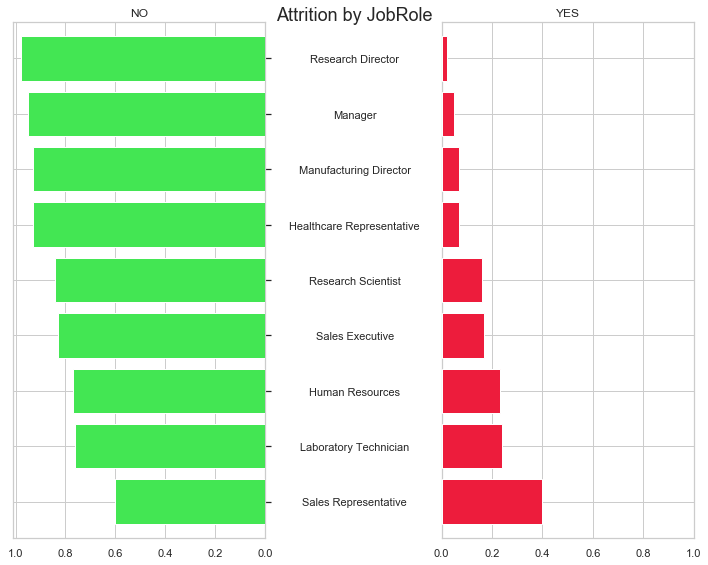

In [60]:
# Data
ct_t = df[['JobRole', 'Attrition', 'Age']].groupby(['JobRole','Attrition'])['Age'].count()
ct_t = pd.DataFrame(ct_t)
ct_t.reset_index(inplace=True)
ct = ct_t.JobRole.unique()
nu = [[0],[1]]

k=[]

for x in ct:
    k.append((ct_t[ct_t['JobRole']==x]['Age'].iloc[0]/(ct_t[ct_t['JobRole']==x]['Age'].iloc[0] + ct_t[ct_t['JobRole']==x]['Age'].iloc[1])).round(2))

k=[0.93, 0.07,0.77,0.23,0.76,0.24,0.95,0.05,0.93,0.07,0.98,0.02,0.84,0.16,0.83,0.17,0.6,0.4]


ct_t['Percentage'] =k
ct_t.drop('Age', 1, inplace=True)





job_r = list(ct_t.JobRole.unique())

att_y = ct_t[ct_t['Attrition']=='Yes']['Percentage'].values

att_n = ct_t[ct_t['Attrition']=='No']['Percentage'].values


# Sort by number of sales staff
idx = att_n.argsort()
job_r, att_y, att_n = [np.take(x, idx) for x in [job_r, att_y, att_n]]
y = np.arange(att_y.size)

fig, axes = plt.subplots(ncols=2, sharey=True, figsize=[10,8])
axes[0].barh(y, att_n, align='center', color='#43e653', zorder=10)
axes[0].set(title='NO')

axes[1].barh(y, att_y, align='center', color='#ed1c3c', zorder=10)
axes[1].set(title='YES')
axes[1].set_xlim(xmax=1)

axes[0].invert_xaxis()
axes[0].set(yticks=y, yticklabels=job_r)
axes[0].yaxis.tick_right()

for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.7)


plt.setp(axes[0].yaxis.get_majorticklabels(), ha='center')


dx = 80 / 72.
dy = 0 / 72.
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)

for label in axes[0].yaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)


fig.suptitle('Attrition by JobRole', size=18)

plt.show()

## Current Managers & Average Satisfaction Score

Text(0.5,0.98,'Dealing With Current Managers \n')

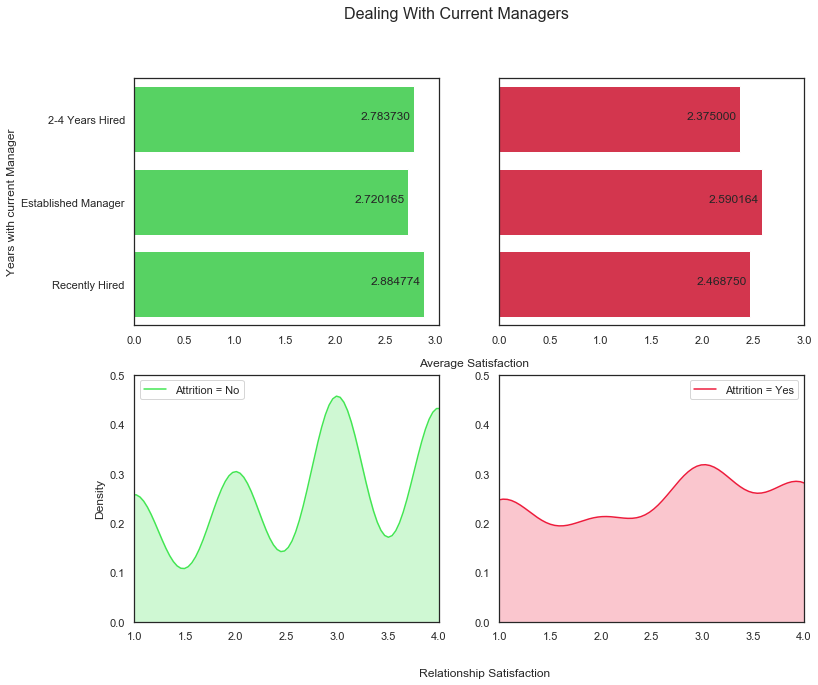

In [61]:
inc_n = df[df['Attrition']=='No']
inc_y = df[df['Attrition']=='Yes']

def year_cat_man(year):
    if year <=1:
        return 'Recently Hired'
    elif 1<year<=4:
        return '2-4 Years Hired'
    else:
        return 'Established Manager'
    

inc_n['Man_Year'] = inc_n['YearsWithCurrManager'].apply(year_cat_man)
inc_y['Man_Year'] = inc_y['YearsWithCurrManager'].apply(year_cat_man) 


inc_n.groupby('Man_Year')['JobSatisfaction'].mean().reset_index()
inc_y.groupby('Man_Year')['JobSatisfaction'].mean().reset_index()


gs = gridspec.GridSpec(2, 4)
gs.update(wspace=0.5)

sns.set(style="white")
fig=plt.figure(figsize=(12,10))
fig.tight_layout(pad=3.0)

ax1 = plt.subplot(gs[0, :2])
ax2 = plt.subplot(gs[0, 2:4])
ax3 = plt.subplot(gs[1, 0:2])
ax4 = plt.subplot(gs[1, 2:4])




f = sns.barplot(x='JobSatisfaction', y='Man_Year',color='#43e653', orient='h',
                data=inc_n.groupby('Man_Year')['JobSatisfaction'].mean().reset_index(), ax=ax1)
f.set_xlabel('')
f.set_ylabel('Years with current Manager')
for p in f.patches:
    val= '{:,f}'.format(p.get_width())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    f.annotate(val,(x-0.55,y))

    
    
g = sns.barplot(x='JobSatisfaction', y='Man_Year',color='#ed1c3c', orient='h',
                data=inc_y.groupby('Man_Year')['JobSatisfaction'].mean().reset_index(), ax=ax2)
g.set_xlim(0,3)
g.set_xlabel('')
g.set_ylabel('')
g.set_yticklabels('')
for p in g.patches:
    val= '{:,f}'.format(p.get_width())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    g.annotate(val,(x-0.55,y))
    

h = sns.kdeplot(data=inc_n['RelationshipSatisfaction'], color='#43e653', ax=ax3, shade=True, label='Attrition = No')
h.set_xlabel('')
h.set_ylabel('Density') 
h.set_ylim(0,0.5)
h.set_xlim(1,4)

i = sns.kdeplot(data=inc_y['RelationshipSatisfaction'], color='#ed1c3c', ax=ax4, shade=True, label='Attrition = Yes')
i.set_xlabel('')
i.set_ylabel('') 
i.set_ylim(0,0.5)
i.set_xlim(1,4)


fig.text(0.455,0.48,'Average Satisfaction')
fig.text(0.455,0.05,'Relationship Satisfaction')
fig.suptitle('Dealing With Current Managers \n', size=16)


## 2.4 In-Depth Look Into Attrition

Digging into Attrition:

In this section, we will go as deep as we can into employees that quit to have a better understanding what were some of the reasons that employees decided to leave the organization.

Questions to Ask Ourselves:
- Attrition by Department: How many employees quit by Department? Did they have a proper work-life balance?


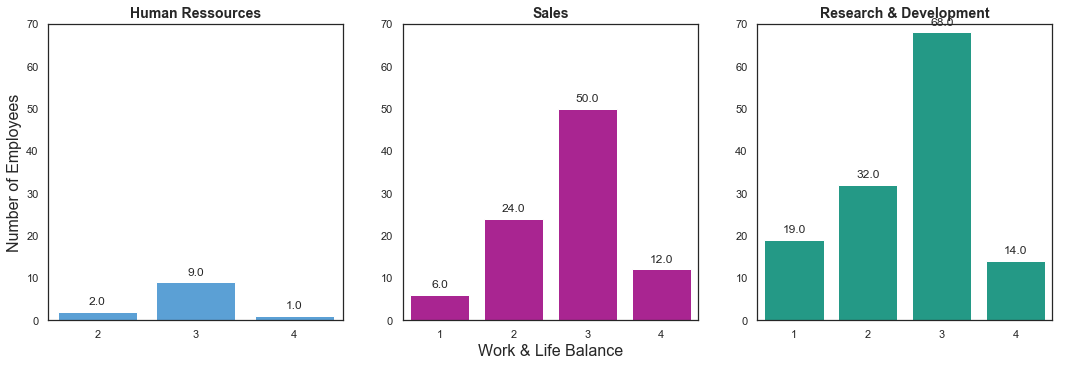

In [62]:
gs = gridspec.GridSpec(2, 6)
gs.update(wspace=0.5)

sns.set(style="white")
fig=plt.figure(figsize=(18,12))
fig.tight_layout(pad=2.0)


ax1 = plt.subplot(gs[1, :2])
ax2 = plt.subplot(gs[1, 2:4])
ax3 = plt.subplot(gs[1, 4:6])


f = sns.barplot(x=inc_y[inc_y['Department']=='Human Resources'].groupby('WorkLifeBalance')['Age'].count().index,
                y=inc_y[inc_y['Department']=='Human Resources'].groupby('WorkLifeBalance')['Age'].count(), 
                color='#47A2E9',ax=ax1)
f.set_ylim(0,70)
f.set_ylabel('Number of Employees', fontsize=16)
f.set_xlabel('')
f.set_title('Human Ressources',fontweight="bold", size=14)
for p in f.patches:
    f.annotate(format(p.get_height(), ''), (p.get_x() + p.get_width() / 2.,p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
    
    
g = sns.barplot(x=inc_y[inc_y['Department']=='Sales'].groupby('WorkLifeBalance')['Age'].count().index,
                y=inc_y[inc_y['Department']=='Sales'].groupby('WorkLifeBalance')['Age'].count(),
                color='#BF0F9F', ax=ax2)
g.set_ylim(0,70)
g.set_ylabel('')
g.set_xlabel('Work & Life Balance', fontsize=16)
g.set_title('Sales',fontweight="bold", size=14)
for p in g.patches:
    g.annotate(format(p.get_height(), ''), (p.get_x() + p.get_width() / 2.,p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
  


    
h = sns.barplot(x=inc_y[inc_y['Department']=='Research & Development'].groupby('WorkLifeBalance')['Age'].count().index,
                y=inc_y[inc_y['Department']=='Research & Development'].groupby('WorkLifeBalance')['Age'].count(), 
                color='#10AD93',ax=ax3)
h.set_ylim(0,70)
h.set_ylabel('')
h.set_xlabel('')
h.set_title('Research & Development',fontweight="bold", size=14)

for p in h.patches:
    h.annotate(format(p.get_height(), ''), (p.get_x() + p.get_width() / 2.,p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    



## 2.5 Correlations and Bi-variate Analysis:

Correlation Matrix:

In this section we will understand what features have a positive correlation with each other. This tells us whether there is an association between two variables. What I like about the correlation section is that it gives us a better understanding of some of the features we are dealing with

Summary:
- The higher the total working years the higher the monthly income of an employee.
- The higher the percent salary hike the higher the performance rating.
- The higher the years with current manager the higher the years since last promotion.
- The higher the age the higher the monthly income.

## 2.5.1 Correlations

In [63]:
#Numerical encoding of the target variable

target_map = {'Yes':1, 'No':0}
df['Attrition_numerical']=df['Attrition'].apply(lambda x: target_map[x])

In [4]:
#Getting all columns with numerical data for further exploration

df.drop(['EmployeeCount', 'StandardHours' ], 1, inplace=True)

numerical=[]

for a in df.columns:
    if df[a].dtypes=='int64':
        numerical.append(a)
        

In [5]:
x = df[numerical]
y = df[numerical]

z = x.corr()

In [6]:
#Checking the numerical data for Correlation. Using Plotly to get an interactive plot

data=go.Heatmap(z=z, x=df[numerical].columns.values, y=df[numerical].columns.values, type='heatmap', colorscale = 'Viridis', reversescale = False)

layout = go.Layout(
    title='Pearson Correlation of numerical features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 900)
    
    
fig = go.Figure(data=data, layout=layout)


py.iplot(fig, filename='labelled-heatmap')

Further Takeaway: A lot of the columns seem to be poorly correlated with one another which is good for our model. So there is no need for further feature space reduction with e.g PCA


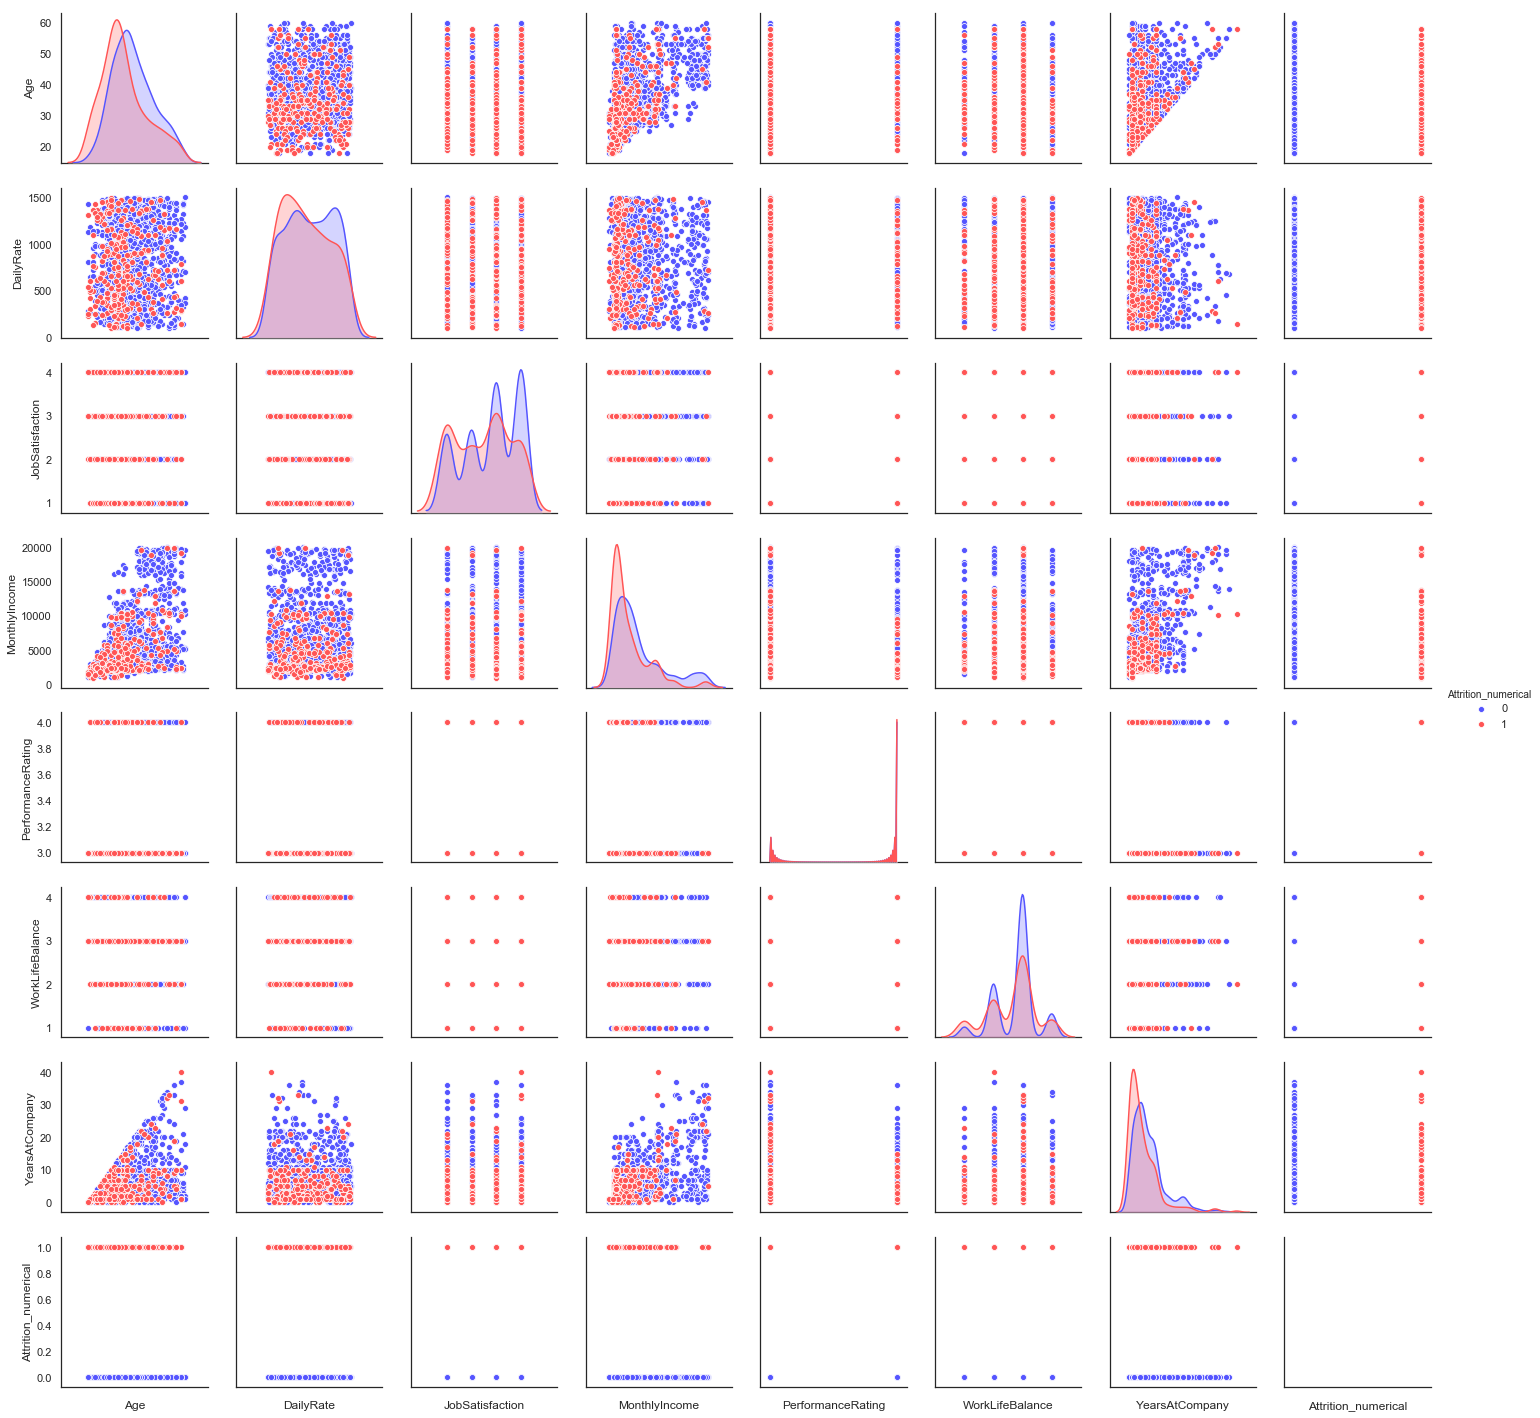

In [67]:
#Further exploration

numerical = [u'Age', u'DailyRate',  u'JobSatisfaction',
       u'MonthlyIncome', u'PerformanceRating',
        u'WorkLifeBalance', u'YearsAtCompany', u'Attrition_numerical']

g = sns.pairplot(df[numerical], hue='Attrition_numerical', palette='seismic', diag_kind = 'kde',diag_kws=dict(shade=True))
g.set(xticklabels=[])

## 2.5.2 Bi-Variate Analysis

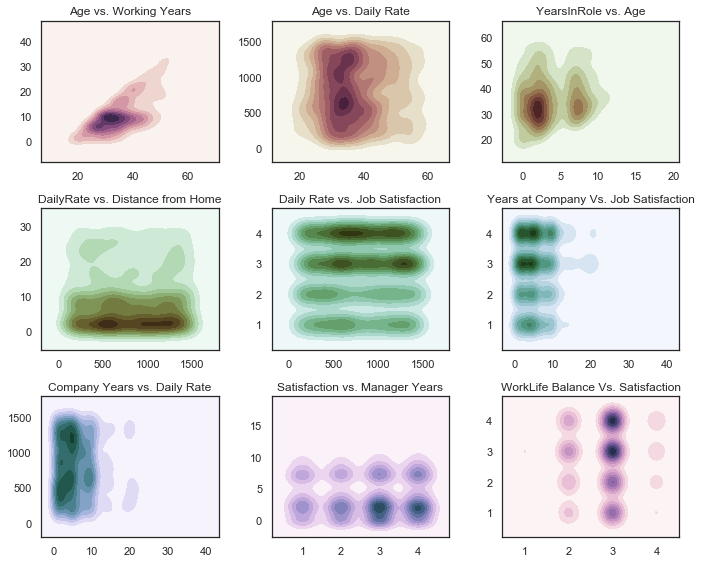

In [68]:

f, axes = plt.subplots(3, 3, figsize=(10, 8), 
                       sharex=False, sharey=False)
s = np.linspace(0, 3, 10)


cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)
x=df['Age']
y=df['TotalWorkingYears']

ax1=sns.kdeplot(x,y, shade=True, cmap=cmap, ax=axes[0,0], cut=5)
ax1.set_title('Age vs. Working Years')
ax1.set_xlabel('')
ax1.set_ylabel('')


cmap = sns.cubehelix_palette(start=0.33, light=1, as_cmap=True)
x=df['Age']
y=df['DailyRate']
ax2=sns.kdeplot(x,y, shade=True, cmap=cmap, ax=axes[0,1])
ax2.set_title('Age vs. Daily Rate')
ax2.set_xlabel('')
ax2.set_ylabel('')


cmap = sns.cubehelix_palette(start=0.66, light=1, as_cmap=True)
x=df['YearsInCurrentRole']
y=df['Age']
ax3=sns.kdeplot(x,y, shade=True, cmap=cmap, ax=axes[0,2])
ax3.set_title('YearsInRole vs. Age')
ax3.set_xlabel('')
ax3.set_ylabel('')


cmap = sns.cubehelix_palette(start=0.99, light=1, as_cmap=True)
x=df['DailyRate']
y=df['DistanceFromHome']
ax4=sns.kdeplot(x,y, shade=True, cmap=cmap, ax=axes[1,0])
ax4.set_title('DailyRate vs. Distance from Home')
ax4.set_xlabel('')
ax4.set_ylabel('')


cmap = sns.cubehelix_palette(start=1.33, light=1, as_cmap=True)
x=df['DailyRate']
y=df['JobSatisfaction']
ax5=sns.kdeplot(x,y, shade=True, cmap=cmap, ax=axes[1,1])
ax5.set_title('Daily Rate vs. Job Satisfaction')
ax5.set_xlabel('')
ax5.set_ylabel('')


cmap = sns.cubehelix_palette(start=1.66, light=1, as_cmap=True)
x=df['YearsAtCompany']
y=df['JobSatisfaction']
ax6=sns.kdeplot(x,y, shade=True, cmap=cmap, ax=axes[1,2])
ax6.set_title('Years at Company Vs. Job Satisfaction')
ax6.set_xlabel('')
ax6.set_ylabel('')


cmap = sns.cubehelix_palette(start=1.9999, light=1, as_cmap=True)
x=df['YearsAtCompany']
y=df['DailyRate']
ax7=sns.kdeplot(x,y, shade=True, cmap=cmap, ax=axes[2,0])
ax7.set_title('Company Years vs. Daily Rate')
ax7.set_xlabel('')
ax7.set_ylabel('')


cmap = sns.cubehelix_palette(start=2.33, light=1, as_cmap=True)
x=df['RelationshipSatisfaction']
y=df['YearsWithCurrManager']
ax8=sns.kdeplot(x,y, shade=True, cmap=cmap, ax=axes[2,1])
ax8.set_title('Satisfaction vs. Manager Years')
ax8.set_xlabel('')
ax8.set_ylabel('')


cmap = sns.cubehelix_palette(start=2.666, light=1, as_cmap=True)
x=df['WorkLifeBalance']
y=df['RelationshipSatisfaction']
ax9=sns.kdeplot(x,y, shade=True, cmap=cmap, ax=axes[2,2])
ax9.set_title('WorkLife Balance Vs. Satisfaction')
ax9.set_xlabel('')
ax9.set_ylabel('')

f.tight_layout()

Text(0,0.5,'Years Since Last Promotion')

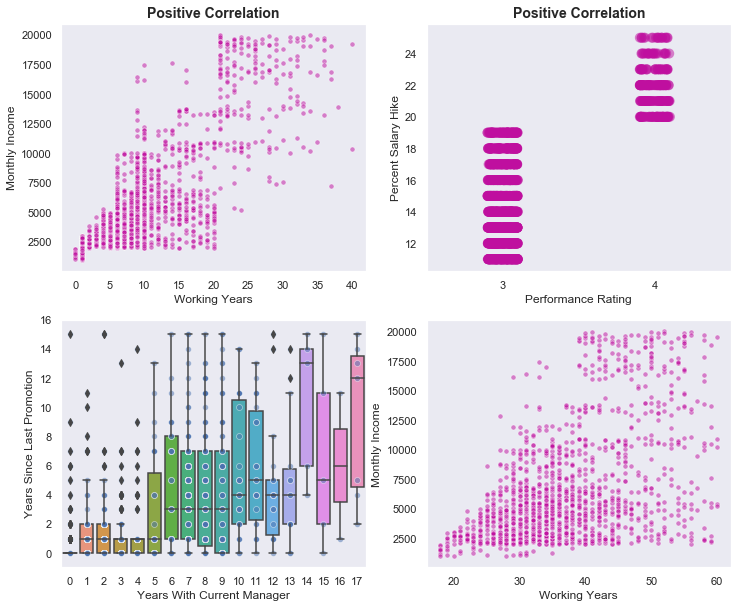

In [69]:
gs = gridspec.GridSpec(2, 4)
gs.update(wspace=0.5)

sns.set(style="dark")
fig=plt.figure(figsize=(12,10))
fig.tight_layout(pad=1.0)

ax1 = plt.subplot(gs[0, :2])
ax2 = plt.subplot(gs[0, 2:4])
ax3 = plt.subplot(gs[1, 0:2])
ax4 = plt.subplot(gs[1, 2:4])


f = sns.scatterplot(x=df['TotalWorkingYears'], y=df['MonthlyIncome'], ax=ax1, s=25, color='#BF0F9F', alpha=0.5)
f.set_xlabel('Working Years')
f.set_ylabel('Monthly Income')
f.set_title('Positive Correlation',fontweight="bold", size=14)


g = sns.stripplot(x=df['PerformanceRating'], y=df['PercentSalaryHike'], ax=ax2, s=10, jitter=1, alpha=0.5, color='#BF0F9F')
g.set_xlabel('Performance Rating')
g.set_ylabel('Percent Salary Hike')
g.title.set_text('Positive Correlation')
g.set_title('Positive Correlation',fontweight="bold", size=14)

h = sns.scatterplot(x=df['Age'], y=df['MonthlyIncome'], ax=ax4, s=25, color='#BF0F9F', alpha=0.5)
h.set_xlabel('Working Years')
h.set_ylabel('Monthly Income')


i = sns.boxplot(x=df['YearsWithCurrManager'], y= df['YearsSinceLastPromotion'], ax=ax3)
i = sns.scatterplot(x=df['YearsWithCurrManager'], y= df['YearsSinceLastPromotion'], alpha=0.5, ax=ax3)
i.set_xlabel('Years With Current Manager')
i.set_ylabel('Years Since Last Promotion')

# 3. Feature Engineering 

## 3.1 Encoding the categorical values

In [70]:
#Get all categorical features and saving them in a list
categorical=[]

for a in df.columns:
    if df[a].dtypes=='object':
        categorical.append(a)

In [71]:
df.drop('Attrition_numerical', axis=1, inplace=True)

In [72]:
numerical = df.columns.difference(categorical)

In [73]:
df[categorical].head()

Attrition     BusinessTravel              Department EducationField  Gender  \
0       Yes      Travel_Rarely                   Sales  Life Sciences  Female   
1        No  Travel_Frequently  Research & Development  Life Sciences    Male   
2       Yes      Travel_Rarely  Research & Development          Other    Male   
3        No  Travel_Frequently  Research & Development  Life Sciences  Female   
4        No      Travel_Rarely  Research & Development        Medical    Male   

                 JobRole MaritalStatus Over18 OverTime  
0        Sales Executive        Single      Y      Yes  
1     Research Scientist       Married      Y       No  
2  Laboratory Technician        Single      Y      Yes  
3     Research Scientist       Married      Y      Yes  
4  Laboratory Technician       Married      Y       No

In [74]:
df_cat = df[categorical]
df_cat.drop('Attrition', axis=1, inplace=True)

In [75]:
df_cat.head()

BusinessTravel              Department EducationField  Gender  \
0      Travel_Rarely                   Sales  Life Sciences  Female   
1  Travel_Frequently  Research & Development  Life Sciences    Male   
2      Travel_Rarely  Research & Development          Other    Male   
3  Travel_Frequently  Research & Development  Life Sciences  Female   
4      Travel_Rarely  Research & Development        Medical    Male   

                 JobRole MaritalStatus Over18 OverTime  
0        Sales Executive        Single      Y      Yes  
1     Research Scientist       Married      Y       No  
2  Laboratory Technician        Single      Y      Yes  
3     Research Scientist       Married      Y      Yes  
4  Laboratory Technician       Married      Y       No

In [76]:
#Numerical encoding of the data via pd.get_dummies
df_cat = pd.get_dummies(df_cat)

In [77]:
df_num = df[numerical]

In [78]:
#Creating the final dataset with numerical data only
df_final = pd.concat([df_num, df_cat], axis=1)

In [79]:
df_final.head(3)

Age  DailyRate  DistanceFromHome  Education  EmployeeNumber  \
0   41       1102                 1          2               1   
1   49        279                 8          1               2   
2   37       1373                 2          2               4   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                        2          94               3         2   
1                        3          61               2         2   
2                        4          92               2         1   

   JobSatisfaction      ...       JobRole_Research Director  \
0                4      ...                               0   
1                2      ...                               0   
2                3      ...                               0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                        0   
2                           0                        0   

   JobRole_Sales Representative  MaritalStatus_Divorced  \
0                             0                       0   
1                             0                       0   
2                             0                       0   

   MaritalStatus_Married  MaritalStatus_Single  Over18_Y  OverTime_No  \
0                      0                     1         1            0   
1                      1                     0         1            1   
2                      0                     1         1            0   

   OverTime_Yes  
0             1  
1             0  
2             1  

[3 rows x 53 columns]

In [80]:
target_map = {'Yes':1, 'No':0}
target = df["Attrition"].apply(lambda x: target_map[x])
target.head(3)

0    1
1    0
2    1
Name: Attrition, dtype: int64

In [81]:
#Checking if the data of the target variable is distributed equally. Imbalances in the target variable could have a negative effect when it comes to building the model.
data=[go.Bar(x=df['Attrition'].value_counts().index, y=df['Attrition'].value_counts().values)]
py.iplot(data)



In [82]:
df["Attrition"].value_counts().index

Index(['No', 'Yes'], dtype='object')

## 3.2 Work with Skewness

Our target variable is skewed and not distributed equally in its categories. Therefore, we'll use the Smote Function as an upsampling method to avoid a loss of information.

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

train, test, target_train, target_val = train_test_split(df_final, 
                                                         target, 
                                                         train_size= 0.80,
                                                         random_state=0);

In [84]:
#SMOTE to oversample due to the skewness in target. I used a upsampling method to avoid a loss of information.

sampler=SMOTE(random_state=0)
smote_train, smote_target = sampler.fit_sample(train,target_train)

# 4. Analysis & Implementation of Machine Learning Models

In the following part we'll implement to different Machine Learning Models. First we'll use a Random Forest Classifier. After that we'll try the Gradient Boosting Classifier. Both models will be compared with eachother and include further visualizations.

## 4.1 Random Forest Classifier

In [85]:
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000,
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : 0,
    'verbose': 0
}

In [86]:
rf = RandomForestClassifier(**rf_params)

In [87]:
fit = rf.fit(smote_train, smote_target)

In [88]:
rf_predictions = rf.predict(test)

In [89]:
#Checking the Accuracy of the model

print("Accuracy score: {}".format(accuracy_score(target_val, rf_predictions)))
print("="*80)
print(classification_report(target_val, rf_predictions))

Accuracy score: 0.8537414965986394
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       245
           1       0.59      0.39      0.47        49

    accuracy                           0.85       294
   macro avg       0.74      0.67      0.69       294
weighted avg       0.84      0.85      0.84       294



In [90]:
#Using Randomized Search for Hyperparameter Tuning. Using Randomized Search instead of GridSearch to keep the runtime low

from sklearn.model_selection import RandomizedSearchCV

In [91]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [1,2,3,4,5,6,7,8,9,10]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [92]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [93]:
rf = RandomForestClassifier()

In [94]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [95]:
rf_random.fit(smote_train, smote_target)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [96]:
rf_random.best_params_

{'n_estimators': 522,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [97]:
pred = rf_random.predict(test)

In [98]:
#Checking the Accuracy of the model

print("Accuracy score: {}".format(accuracy_score(target_val, pred)))
print("="*80)
print(classification_report(target_val, pred))

Accuracy score: 0.8775510204081632
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       245
           1       0.84      0.33      0.47        49

    accuracy                           0.88       294
   macro avg       0.86      0.66      0.70       294
weighted avg       0.87      0.88      0.85       294



**Takeaway**

The Random Forest Classifier returns an accuracy of 87% for its predictions. We have to keep in mind that the distribution of the target variable used to be skewed with 84% of yes and 16% of no's. So the model is slightly better than random guessing

It would be more informative to balance out the precision and recall scores as show in the classification report outputs. Where it falls down to the business considerations over whether one should prioritise for a metric over the other - i.e. Precision vs Recall.

In [99]:
#Having a look on the importances of the features + visualization

fit.feature_importances_

array([1.57241423e-02, 3.48879898e-03, 5.56675345e-03, 6.16420881e-03,
       2.18830155e-03, 1.46836861e-02, 2.06315771e-03, 1.25276173e-02,
       4.16983979e-02, 3.65854687e-02, 4.02121093e-02, 3.12269254e-03,
       7.61602157e-03, 1.65288620e-03, 8.64371079e-04, 9.51406237e-03,
       6.35993438e-02, 2.39162966e-02, 3.28221791e-03, 1.51724826e-02,
       1.65555001e-02, 1.59447097e-02, 2.47883001e-03, 1.64212820e-02,
       3.68696987e-03, 5.32048717e-02, 1.95237532e-02, 1.13733139e-03,
       3.27350167e-02, 2.38222883e-02, 5.12744731e-04, 1.93492942e-02,
       5.23466422e-03, 3.01819199e-02, 3.74707748e-04, 2.94265540e-03,
       7.51530510e-03, 6.66618463e-03, 3.70653183e-03, 1.49373073e-03,
       1.60014353e-02, 1.72285660e-04, 3.78631704e-03, 1.22798609e-04,
       5.49912087e-03, 1.09134342e-02, 8.94683374e-03, 1.01789410e-02,
       1.58734097e-02, 7.40118680e-02, 0.00000000e+00, 1.42583377e-01,
       1.38778871e-01])

In [100]:
trace = go.Scatter(y=fit.feature_importances_, x=df_final.columns.values, 
                   mode='markers',
                   marker=dict(sizemode = 'diameter',
                               sizeref = 1,
                               size = 13,
                               color = fit.feature_importances_,
                               colorscale='Portland',
                               showscale=True),
                   text = df_final.columns.values), 

data=trace

layout = go.Layout(autosize=True, title="Feature Importance", hovermode='closest',
                   yaxis_title="Feature Importance", height=800, width=1100, showlegend=False,
                   paper_bgcolor='rgba(0,0,0,0)',
                   plot_bgcolor='rgba(0,0,0,0)',
                   xaxis= dict(ticklen= 5,
                               showgrid=False,
                               zeroline=False,),
                   yaxis = dict(ticklen= 5,
                               showgrid=False,
                               zeroline=False,))



fig = go.Figure(data=data, layout=layout)
fig.show()


In [101]:
#Visualization of Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 


dtree = DecisionTreeClassifier(max_depth=4)
dtree.fit(train, target_train)
y_pred = dtree.predict(test)

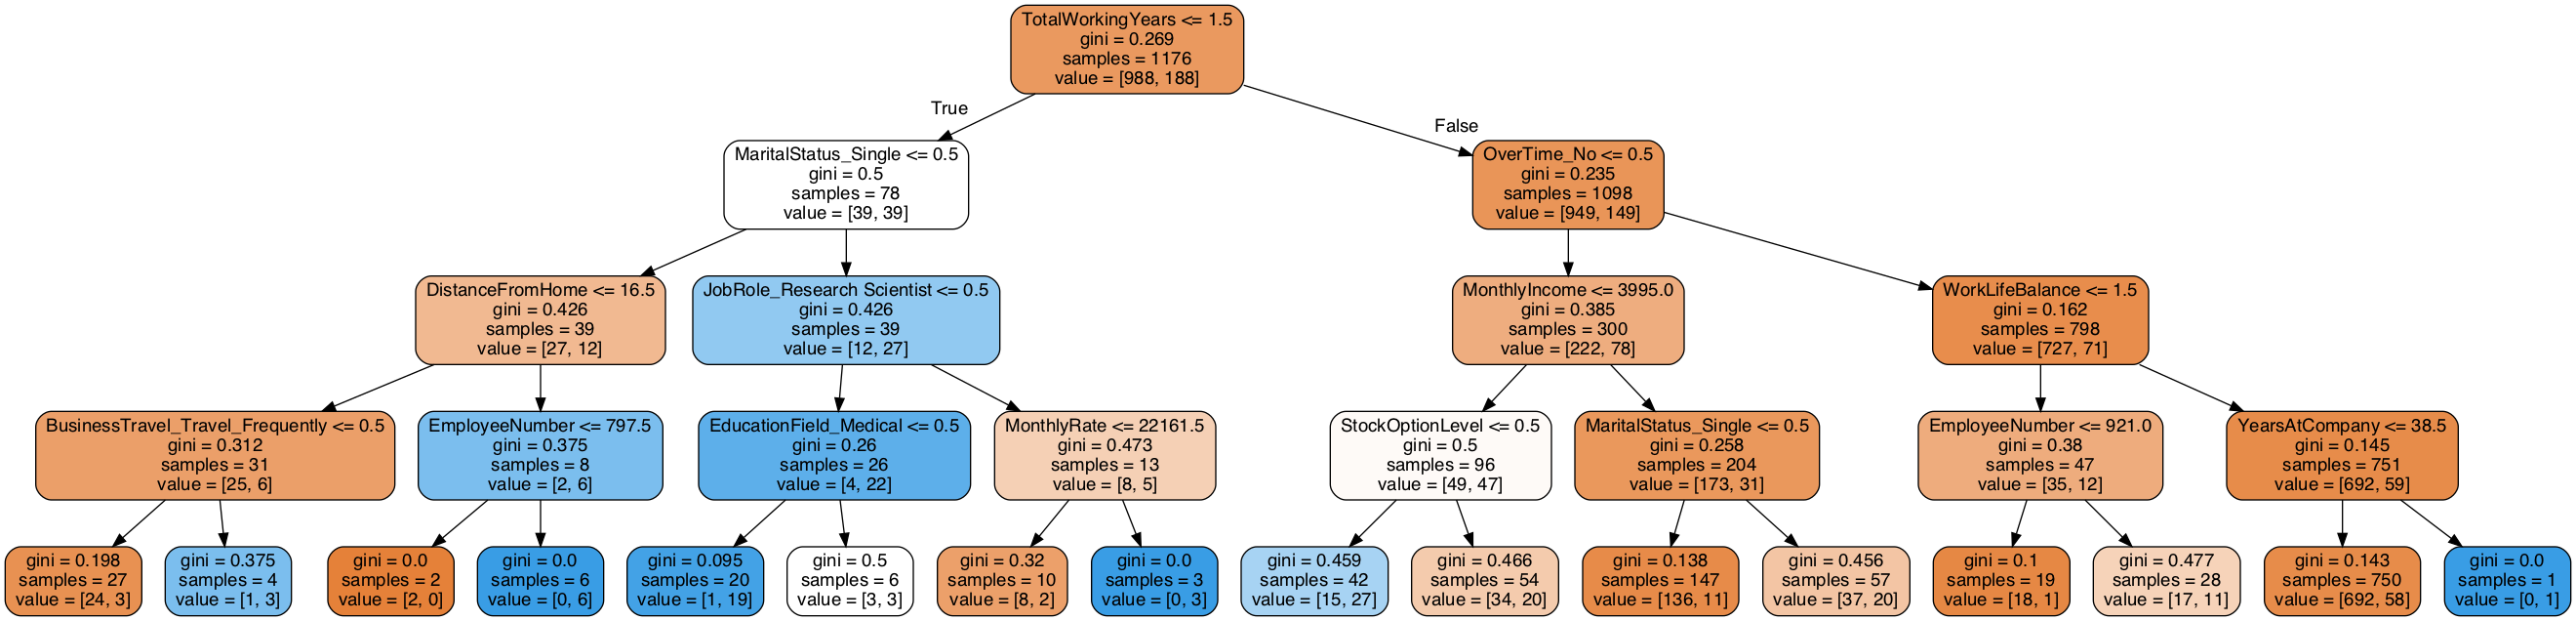

In [102]:
features = list(df_final.columns.values)

dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())


## 4.2 Gradient Boosting Classifier

As an alternative to the Random Forest I tried the Gradient Boosted Classifier as another ensemble technique

In [103]:
gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'verbose': 0
}

In [104]:
gb = GradientBoostingClassifier(**gb_params)
gb.fit(smote_train, smote_target)
gb_predictions = gb.predict(test)

In [105]:
print(accuracy_score(target_val, gb_predictions))
print(classification_report(target_val, gb_predictions))

0.8571428571428571
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       245
           1       0.65      0.31      0.42        49

    accuracy                           0.86       294
   macro avg       0.76      0.64      0.67       294
weighted avg       0.84      0.86      0.83       294



In [138]:
#Hyperparameter Tuning with Randomized Search

params ={
    'n_estimators': [500, 700, 1000, 1100, 1200,1300,1400,1500],
    'max_features': [1,2,3,4,5,6,7,8,9],
    'learning_rate' : [0.001,0.01,0.1,0.2,0.25,0.3],
    'max_depth': [2,3,4,4.5,5,6,7,8,9,10],
    'min_samples_leaf': [1,2,3,4,5],
    'max_features' : ['auto','sqrt']
}

In [139]:
gb_random = RandomizedSearchCV(estimator = gb, param_distributions = params, n_iter = 100, cv = 3, verbose=0, random_state=1, n_jobs = -1)

In [140]:
gb_random.fit(smote_train, smote_target)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.25,
                                                        loss='deviance',
                                                        max_depth=4,
                                                        max_features='sqrt',
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=2,
                                                        min_samples_split=2,
                                                 

In [141]:
gb_random.best_params_

{'n_estimators': 700,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'learning_rate': 0.01}

In [142]:
pred = gb_random.predict(test)

In [143]:
print(accuracy_score(target_val, pred))
print(classification_report(target_val, pred))

0.8775510204081632
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       245
           1       0.88      0.31      0.45        49

    accuracy                           0.88       294
   macro avg       0.88      0.65      0.69       294
weighted avg       0.88      0.88      0.85       294



In [144]:
params ={
    'n_estimators': [1200,1300,1400],
    'max_features': [6,7,8,9],
    'learning_rate' : [0.01],
    'max_depth': [2,3,4,4.5,5,6,7,8,9,10],
    'min_samples_leaf': [1,2,3,4,5],
    'max_features' : ['auto','sqrt']
}

In [145]:
gb_random = RandomizedSearchCV(estimator = gb, param_distributions = params, n_iter = 100, cv = 3, verbose=0, random_state=1, n_jobs = -1)

In [146]:
gb_random.fit(smote_train, smote_target)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.25,
                                                        loss='deviance',
                                                        max_depth=4,
                                                        max_features='sqrt',
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=2,
                                                        min_samples_split=2,
                                                 

In [ ]:
gb_random.best_params_

In [ ]:
pred = gb_random.predict(test)

In [ ]:
print(accuracy_score(target_val, pred))
print(classification_report(target_val, pred))

**Takeaway:**

GBC returns an accuracy of 87% after tuning of hyperparameters.

In [130]:
#Having a look on the importances of the features + visualization

gb.feature_importances_

array([1.65173379e-02, 1.71652465e-02, 1.29592219e-02, 5.53293893e-03,
       1.01340656e-02, 2.06557769e-02, 6.15255147e-03, 4.33083128e-02,
       2.63758516e-02, 4.44982081e-02, 6.35431677e-02, 1.31743615e-02,
       2.14472362e-02, 6.47106669e-03, 3.77489729e-04, 1.30139964e-02,
       6.27701025e-02, 1.23863499e-02, 3.26673567e-03, 1.25958205e-02,
       3.22375622e-02, 8.44264696e-03, 6.90150290e-03, 1.74076716e-02,
       8.33376731e-03, 2.28464756e-02, 1.82223695e-02, 6.50939735e-04,
       4.04797595e-02, 3.77496341e-02, 1.16353897e-03, 3.73200881e-02,
       2.48903688e-03, 3.25503779e-02, 1.71205661e-03, 1.15351503e-03,
       1.56801412e-02, 2.04797931e-03, 5.69069697e-03, 1.35043095e-03,
       1.31826860e-02, 2.66408370e-05, 2.45505186e-03, 9.36959489e-05,
       7.84668721e-03, 1.28861366e-02, 4.08114941e-03, 1.01500547e-02,
       4.07142191e-02, 3.34009619e-02, 0.00000000e+00, 3.85602890e-02,
       1.29826398e-01])

In [131]:
trace = go.Scatter(y=gb.feature_importances_, x=df_final.columns.values, 
                   mode='markers',
                   marker=dict(sizemode = 'diameter',
                               sizeref = 1,
                               size = 13,
                               color = gb.feature_importances_,
                               colorscale='Portland',
                               showscale=True),
                   text = df_final.columns.values), 

data=trace

layout = go.Layout(autosize=True, title="Feature Importance", hovermode='closest',
                   yaxis_title="Feature Importance", height=800, width=1100, showlegend=False,
                   paper_bgcolor='rgba(0,0,0,0)',
                   plot_bgcolor='rgba(0,0,0,0)',
                   xaxis= dict(ticklen= 5,
                               showgrid=False,
                               zeroline=False,),
                   yaxis = dict(ticklen= 5,
                               showgrid=False,
                               zeroline=False,))



fig = go.Figure(data=data, layout=layout)
fig.show()

# 5. Interpretation

We started this project with a detailed EDA to dig deeper into our data. This allowed us to get a first idea which circumstances can possibly lead to attrition. After engineering the features (e.g handling imbalanced target variable) we implented two models in the form of a Random Forest and a Gradient Boosting classifier and tuned its hyperparameters via Random Search. The notebook returns a 88% accuracy in its predictions. 
Important features seem to be:

- **Overtime**: As expected, overtime has a huge impact if an employee will leave the organization or not. 

- **Monthly Income**:  Income is a factor as why employees leave the organization in search for a better salary.

- **Stock Option Level**: In both models the option on stocks influences the level of attrition.


Nevertheless, there is still room for improvement e.g. more features could be engineered from the data. 
Furthermore, one could improve the outcome by for example using some form of blending or stacking of models, where a handful of classifiers votes on the outcome of the predictions and we eventually take the majority vote.
